<b>Task 1: Find the largest number</b>

<i>You have two integers, either positive or negative, and the challenge is to generate a quantum 
    
algorithm that returns which is the larger number. Consider an appropriate number of qubits and 
    
explain why your proposal is valid for all kinds of numbers in case you have an infinite number of 
    
qubits.</i>


<b>def</b>        find_the_largest_number (int:number_1, int ,number_2):

           “””
           number_1 : integer value that is the first parameter to the function,
           
           number_2 : integer value that is the second parameter to the function.
           
           return the largest number between number_1 and number_2
           “””

     # use a framework that works with quantum circuits, qiskit, cirq, pennylane, etc. 

      # consider print your quantum circuit

Given 2 positive integer numbers with 1 number smaller than the other, a quantum algorithm 

comparing closeness to the |1> state on the bloch sphere as a measure of which number is bigger

is adequate for our needs.

It is also practical assuming the bigger the number, the more energy the input pulse has hence 

the more probability it has flipping the qubit from |0> to |1>.

The algorithm can be improved using counts so as to actually return the bigger number given a simulated run of each of the two quantum states a certain number of shots.

For more than 2 integers, the maximum can be found using Grover's search algorithm.

In [2]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
from math import pi


def find_the_largest_number (number_1, number_2):
    
    theta_1 = (number_1/(number_1 + number_2))*pi
    theta_2 = (number_2/(number_1 + number_2))*pi
    
    circ = QuantumCircuit(2,2)
    circ.ry(theta_1, 0)
    circ.ry(theta_2, 1)
    circ.draw('mpl')
    
    simulator = Aer.get_backend('statevector_simulator')
    circ = transpile(circ, simulator)
    results = simulator.run(circ).result()
    
    #sim = Aer.get_backend('statevector_simulator')
    #job = execute(circ, sim)
    #results = job.result()
    sv = results.get_statevector()
    #counts = result.get_counts()
    return plot_bloch_multivector(sv)
    
    #plot_histogram(counts, title='Bell-State 1 Counts')

C:\Users\Student5\anaconda3\anaconda2\envs\QWorld_Summer_School\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


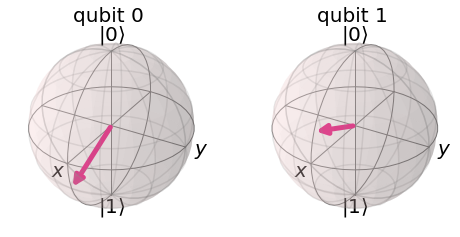

In [3]:
find_the_largest_number(5,3)